<a href="https://colab.research.google.com/github/mukund-n/EDA---DA---21BDS0001/blob/main/EDA_21BDS0001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the dataset:

In [21]:
import pandas as pd
link = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/CreditCard.csv'
BDS0001 = pd.read_csv(link)
BDS0001.head()

,rownames,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,2,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,3,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,4,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,5,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


# Module 2

In [13]:
BDS0001.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rownames     1319 non-null   int64  
 1   card         1319 non-null   object 
 2   reports      1319 non-null   int64  
 3   age          1319 non-null   float64
 4   income       1319 non-null   float64
 5   share        1319 non-null   float64
 6   expenditure  1319 non-null   float64
 7   owner        1319 non-null   object 
 8   selfemp      1319 non-null   object 
 9   dependents   1319 non-null   int64  
 10  months       1319 non-null   int64  
 11  majorcards   1319 non-null   int64  
 12  active       1319 non-null   int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 134.1+ KB


In [14]:
BDS0001.describe()

,rownames,reports,age,income,share,expenditure,dependents,months,majorcards,active
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,660.000000,0.456406,33.213103,3.365376,0.068732,185.057071,0.993935,55.267627,0.817286,6.996967
std,380.906813,1.345267,10.142783,1.693902,0.094656,272.218917,1.247745,66.271746,0.386579,6.305812
min,1.000000,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000
25%,330.500000,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,12.000000,1.000000,2.000000
50%,660.000000,0.000000,31.250000,2.900000,0.038827,101.298300,1.000000,30.000000,1.000000,6.000000
75%,989.500000,0.000000,39.416670,4.000000,0.093617,249.035800,2.000000,72.000000,1.000000,11.000000
max,1319.000000,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,540.000000,1.000000,46.000000


Checking for the possibility to remove some columns:

In [15]:
BDS0001['card'].value_counts()

,count
card,
yes,1023
no,296


In [16]:
BDS0001['selfemp'].value_counts()

,count
selfemp,
no,1228
yes,91


In [17]:
BDS0001['majorcards'].value_counts()

,count
majorcards,
1,1078
0,241


In [73]:
BDS0001['reports'].value_counts()

,count
reports,
0,1060
1,137
2,50
3,24
4,17
5,11
7,6
6,5
11,4


In [18]:
len(BDS0001)

1319

In [19]:
BDS0001.tail(1)

,rownames,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
1318,1319,yes,0,48.25,3.7,0.111619,344.1575,yes,no,2,2,1,0


Modify the dataset to use the coumn "rownames" as index

In [23]:
BDS0001 = BDS0001.set_index(['rownames']).sort_index()
BDS0001.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
rownames,,,,,,,,,,,,
1,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
2,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
3,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
4,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
5,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


Checking for missing data:

In [25]:
BDS0001.isnull().sum()

,0
card,0
reports,0
age,0
income,0
share,0
expenditure,0
owner,0
selfemp,0
dependents,0
months,0


There are no missing values in the dataset.

Now we check for duplicated values excluding the "rownames" column.

In [26]:
BDS0001.columns

Index(['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

In [29]:
BDS0001[BDS0001.duplicated(['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active'])]

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
rownames,,,,,,,,,,,,


There are no duplicate values in the dataset.

**Let us explore binning operations:**

Based on age:

In [30]:
age_bins_vals = [0,10,20,30,40,50,60,70,80,90,100]
age_bins = pd.cut(BDS0001['age'], age_bins_vals)
age_bins.value_counts()

,count
age,
"(20, 30]",565
"(30, 40]",422
"(40, 50]",219
"(50, 60]",61
"(10, 20]",22
"(60, 70]",19
"(0, 10]",7
"(70, 80]",2
"(80, 90]",2


Based on income:

In [34]:
income_bins = pd.cut(BDS0001['income'], bins=5)
income_bins.value_counts()

,count
income,
"(0.197, 2.868]",648
"(2.868, 5.526]",550
"(5.526, 8.184]",92
"(8.184, 10.842]",24
"(10.842, 13.5]",5


Bases on expenditure:

In [38]:
expenditure_bins_vals = [0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000]
expenditure_bins = pd.cut(BDS0001['expenditure'], expenditure_bins_vals)
expenditure_bins.value_counts()

,count
expenditure,
"(0, 500]",891
"(500, 1000]",90
"(1500, 2000]",10
"(1000, 1500]",8
"(2000, 2500]",2
"(3000, 3500]",1
"(2500, 3000]",0
"(3500, 4000]",0
"(4000, 4500]",0


Based on active:

In [41]:
income_bins = pd.cut(BDS0001['active'], bins=5)
income_bins.value_counts()

,count
active,
"(-0.046, 9.2]",932
"(9.2, 18.4]",317
"(18.4, 27.6]",60
"(27.6, 36.8]",8
"(36.8, 46.0]",2


# Module 3

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

**1. Univariate Analysis**

**For numeical values**

Histogram:

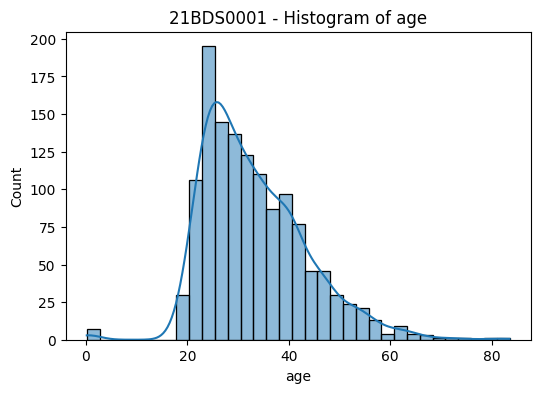

In [54]:
plt.figure(figsize=(6,4))
sns.histplot(BDS0001['age'], kde=True)
plt.title('21BDS0001 - Histogram of age')
plt.show()

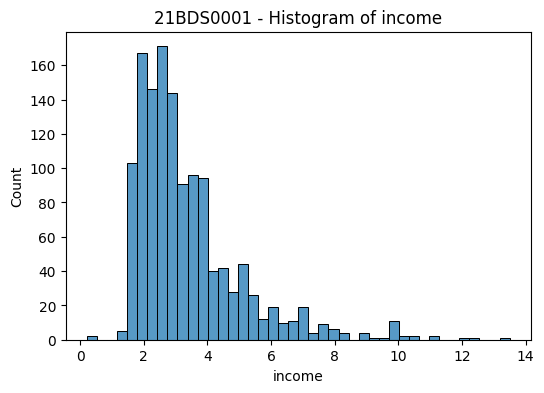

In [55]:
plt.figure(figsize=(6,4))
sns.histplot(BDS0001['income'])
plt.title('21BDS0001 - Histogram of income')
plt.show()

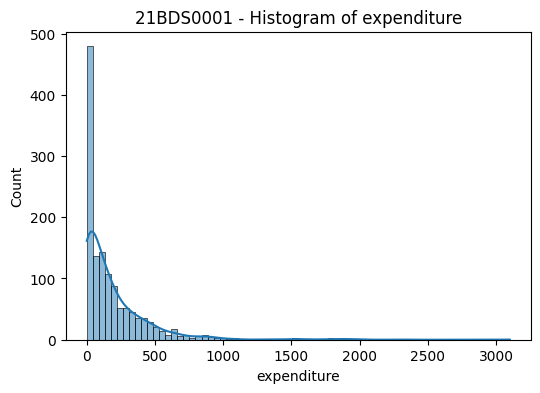

In [56]:
plt.figure(figsize=(6,4))
sns.histplot(BDS0001['expenditure'], kde=True)
plt.title('21BDS0001 - Histogram of expenditure')
plt.show()

Distplot :

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


<Figure size 600x400 with 0 Axes>

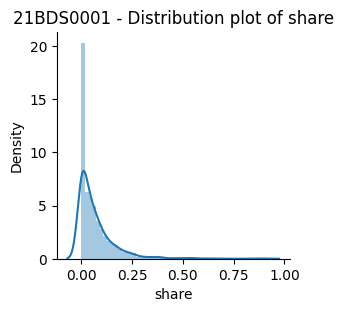

In [57]:
plt.figure(figsize=(6,4))
sns.FacetGrid(BDS0001).map(sns.distplot,"share").add_legend()
plt.title('21BDS0001 - Distribution plot of share')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


<Figure size 600x400 with 0 Axes>

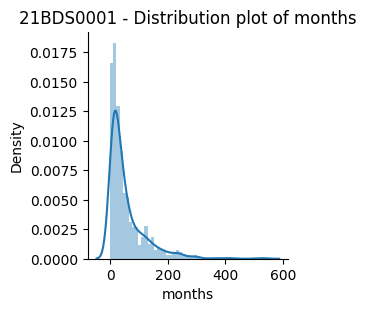

In [64]:
plt.figure(figsize=(6,4))
sns.FacetGrid(BDS0001).map(sns.distplot,"months").add_legend()
plt.title('21BDS0001 - Distribution plot of months')
plt.show()

Box-plot :

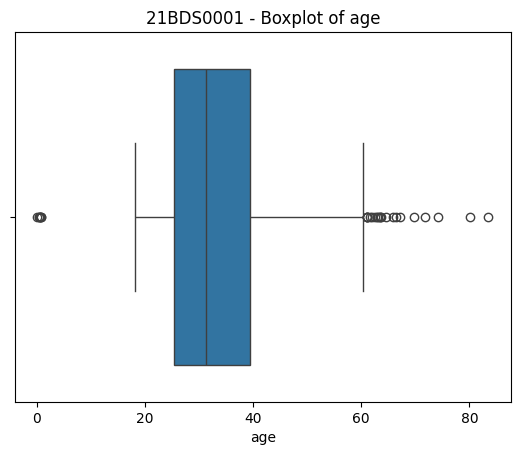

In [60]:
sns.boxplot(x=BDS0001['age'])
plt.title('21BDS0001 - Boxplot of age')
plt.show()

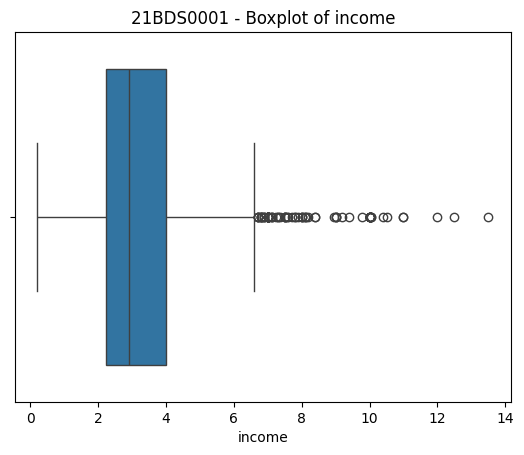

In [61]:
sns.boxplot(x=BDS0001['income'])
plt.title('21BDS0001 - Boxplot of income')
plt.show()

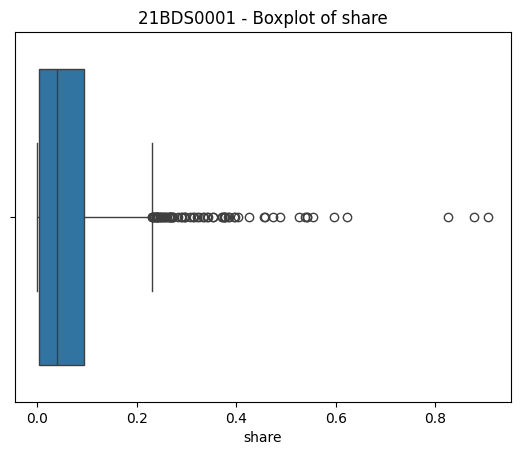

In [62]:
sns.boxplot(x=BDS0001['share'])
plt.title('21BDS0001 - Boxplot of share')
plt.show()

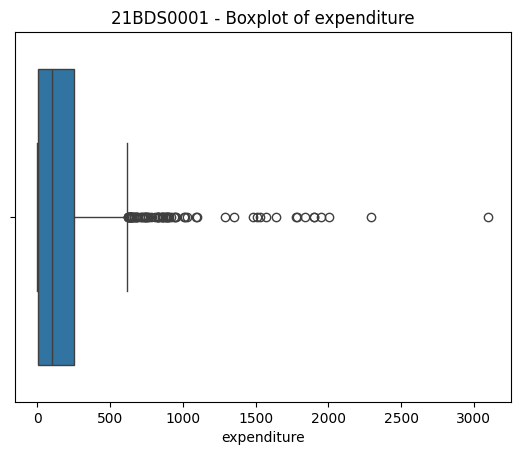

In [63]:
sns.boxplot(x=BDS0001['expenditure'])
plt.title('21BDS0001 - Boxplot of expenditure')
plt.show()

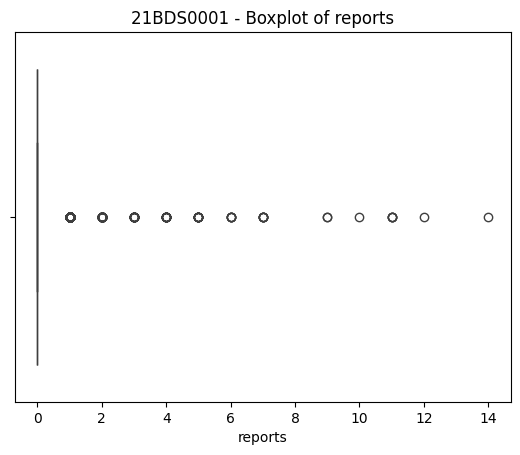

In [72]:
sns.boxplot(x=BDS0001['reports'])
plt.title('21BDS0001 - Boxplot of reports')
plt.show()

**For Categorical Values :**

Bar Chart:

Text(0.5, 0, 'Number of the dependants')

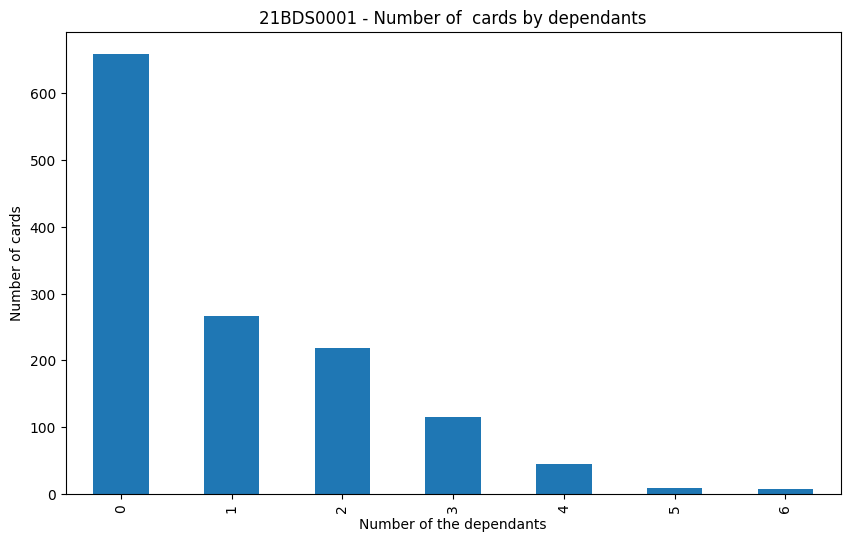

In [69]:
BDS0001.dependents.value_counts().plot(kind='bar', figsize=(10,6))
plt.title("21BDS0001 - Number of  cards by dependants")
plt.ylabel('Number of cards')
plt.xlabel('Number of the dependants')

Countplots:

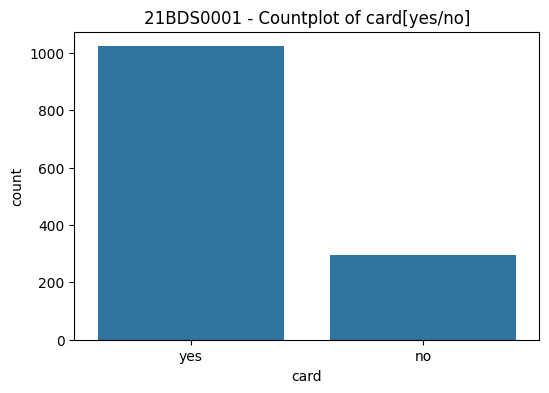

In [79]:
plt.figure(figsize=(6,4))
sns.countplot(x=BDS0001['card'])
plt.title('21BDS0001 - Countplot of card[yes/no]')
plt.show()

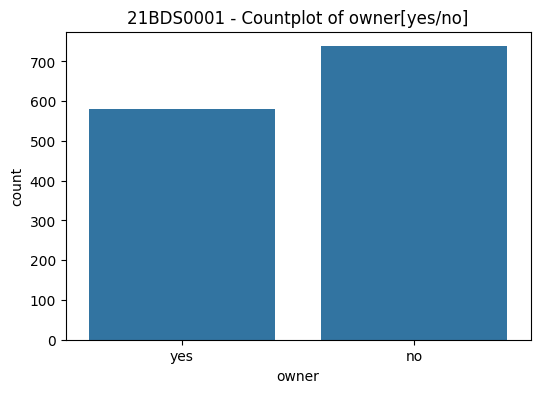

In [78]:
plt.figure(figsize=(6,4))
sns.countplot(x=BDS0001['owner'])
plt.title('21BDS0001 - Countplot of owner[yes/no]')
plt.show()

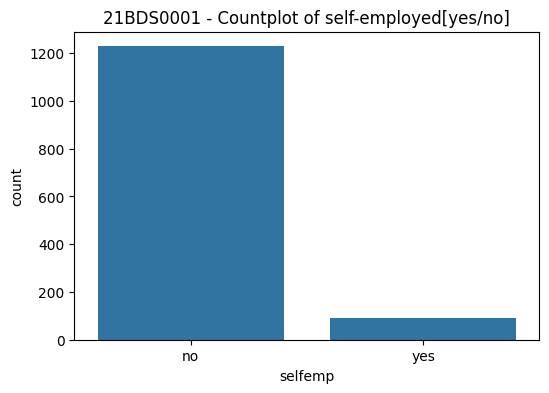

In [77]:
plt.figure(figsize=(6,4))
sns.countplot(x=BDS0001['selfemp'])
plt.title('21BDS0001 - Countplot of self-employed[yes/no]')
plt.show()